In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

27it [00:00, 268.64it/s]

59it [00:00, 281.21it/s]

76it [00:00, 234.04it/s]

110it [00:00, 256.69it/s]

144it [00:00, 275.75it/s]

178it [00:00, 291.61it/s]

212it [00:00, 303.89it/s]

246it [00:00, 312.40it/s]

279it [00:00, 311.99it/s]

310it [00:01, 303.06it/s]

344it [00:01, 311.80it/s]

378it [00:01, 318.20it/s]

411it [00:01, 319.04it/s]

445it [00:01, 324.03it/s]

479it [00:01, 328.63it/s]

514it [00:01, 332.03it/s]

548it [00:01, 333.27it/s]

582it [00:01, 333.63it/s]

616it [00:01, 335.17it/s]

650it [00:02, 336.24it/s]

684it [00:02, 337.01it/s]

718it [00:02, 337.66it/s]

752it [00:02, 335.03it/s]

787it [00:02, 337.22it/s]

822it [00:02, 340.50it/s]

857it [00:02, 341.94it/s]

892it [00:02, 343.03it/s]

928it [00:02, 345.01it/s]

963it [00:02, 345.03it/s]

998it [00:03, 330.28it/s]

1032it [00:03, 328.76it/s]

1066it [00:03, 329.50it/s]

1100it [00:03, 328.88it/s]

1133it [00:03, 328.68it/s]

1167it [00:03, 329.85it/s]

1201it [00:03, 330.37it/s]

1235it [00:03, 329.66it/s]

1268it [00:03, 329.31it/s]

1302it [00:03, 330.02it/s]

1336it [00:04, 329.61it/s]

1370it [00:04, 329.86it/s]

1404it [00:04, 329.66it/s]

1437it [00:04, 321.67it/s]

1470it [00:04, 323.81it/s]

1503it [00:04, 300.55it/s]

1536it [00:04, 308.71it/s]

1569it [00:04, 313.72it/s]

1602it [00:04, 317.29it/s]

1636it [00:05, 321.55it/s]

1669it [00:05, 322.94it/s]

1702it [00:05, 322.82it/s]

1735it [00:05, 324.70it/s]

1769it [00:05, 326.80it/s]

1803it [00:05, 327.85it/s]

1836it [00:05, 327.17it/s]

1869it [00:05, 327.66it/s]

1902it [00:05, 315.01it/s]

1934it [00:05, 310.06it/s]

1968it [00:06, 315.97it/s]

2001it [00:06, 318.87it/s]

2034it [00:06, 321.01it/s]

2067it [00:06, 302.47it/s]

2098it [00:06, 216.16it/s]

2124it [00:06, 169.84it/s]

2156it [00:06, 197.04it/s]

2189it [00:07, 223.98it/s]

2221it [00:07, 245.15it/s]

2254it [00:07, 265.19it/s]

2288it [00:07, 282.04it/s]

2321it [00:07, 294.35it/s]

2353it [00:07, 283.36it/s]

2386it [00:07, 295.01it/s]

2420it [00:07, 305.41it/s]

2452it [00:07, 289.65it/s]

2484it [00:08, 295.95it/s]

2515it [00:08, 295.07it/s]

2545it [00:08, 294.17it/s]

2575it [00:08, 294.40it/s]

2608it [00:08, 303.93it/s]

2641it [00:08, 311.00it/s]

2675it [00:08, 316.74it/s]

2709it [00:08, 320.51it/s]

2742it [00:08, 322.91it/s]

2775it [00:08, 309.69it/s]

2808it [00:09, 313.47it/s]

2840it [00:09, 313.45it/s]

2873it [00:09, 317.60it/s]

2907it [00:09, 321.26it/s]

2940it [00:09, 323.42it/s]

2973it [00:09, 309.03it/s]

3005it [00:09, 309.00it/s]

3037it [00:09, 300.82it/s]

3068it [00:09, 289.28it/s]

3101it [00:10, 299.56it/s]

3135it [00:10, 308.87it/s]

3168it [00:10, 314.32it/s]

3201it [00:10, 317.90it/s]

3234it [00:10, 321.07it/s]

3268it [00:10, 324.31it/s]

3301it [00:10, 309.20it/s]

3334it [00:10, 313.94it/s]

3367it [00:10, 317.72it/s]

3400it [00:10, 320.70it/s]

3433it [00:11, 309.33it/s]

3467it [00:11, 315.48it/s]

3500it [00:11, 319.44it/s]

3533it [00:11, 318.14it/s]

3567it [00:11, 323.14it/s]

3600it [00:11, 324.88it/s]

3634it [00:11, 327.86it/s]

3668it [00:11, 329.70it/s]

3702it [00:11, 331.08it/s]

3736it [00:11, 331.63it/s]

3770it [00:12, 331.86it/s]

3804it [00:12, 332.17it/s]

3838it [00:12, 332.33it/s]

3872it [00:12, 331.23it/s]

3906it [00:12, 331.43it/s]

3940it [00:12, 331.69it/s]

3974it [00:12, 333.52it/s]

4008it [00:12, 334.06it/s]

4042it [00:12, 333.69it/s]

4076it [00:13, 333.57it/s]

4111it [00:13, 336.05it/s]

4145it [00:13, 336.03it/s]

4179it [00:13, 334.87it/s]

4213it [00:13, 334.18it/s]

4247it [00:13, 335.01it/s]

4281it [00:13, 335.95it/s]

4315it [00:13, 335.93it/s]

4349it [00:13, 336.54it/s]

4384it [00:13, 337.55it/s]

4418it [00:14, 335.81it/s]

4452it [00:14, 334.89it/s]

4486it [00:14, 334.36it/s]

4520it [00:14, 334.72it/s]

4554it [00:14, 335.35it/s]

4588it [00:14, 336.43it/s]

4622it [00:14, 333.35it/s]

4656it [00:14, 279.27it/s]

4689it [00:14, 290.97it/s]

4722it [00:15, 301.15it/s]

4756it [00:15, 309.36it/s]

4789it [00:15, 314.65it/s]

4823it [00:15, 319.28it/s]

4857it [00:15, 322.82it/s]

4890it [00:15, 324.41it/s]

4924it [00:15, 326.43it/s]

4958it [00:15, 328.64it/s]

4991it [00:15, 326.05it/s]

5025it [00:15, 329.20it/s]

5059it [00:16, 330.38it/s]

5094it [00:16, 333.39it/s]

5128it [00:16, 327.26it/s]

5162it [00:16, 328.48it/s]

5195it [00:16, 321.65it/s]

5229it [00:16, 326.28it/s]

5263it [00:16, 328.24it/s]

5296it [00:16, 324.60it/s]

5329it [00:16, 323.62it/s]

5362it [00:16, 303.90it/s]

5395it [00:17, 310.45it/s]

5427it [00:17, 305.56it/s]

5461it [00:17, 312.97it/s]

5495it [00:17, 317.75it/s]

5528it [00:17, 321.31it/s]

5562it [00:17, 324.39it/s]

5595it [00:17, 325.24it/s]

5629it [00:17, 329.37it/s]

5663it [00:17, 330.24it/s]

5698it [00:18, 333.73it/s]

5733it [00:18, 335.53it/s]

5767it [00:18, 336.36it/s]

5801it [00:18, 331.32it/s]

5835it [00:18, 320.17it/s]

5868it [00:18, 322.34it/s]

5901it [00:18, 275.82it/s]

5935it [00:18, 290.92it/s]

5969it [00:18, 302.17it/s]

6001it [00:18, 304.86it/s]

6035it [00:19, 313.05it/s]

6069it [00:19, 319.96it/s]

6102it [00:19, 291.55it/s]

6134it [00:19, 299.26it/s]

6165it [00:19, 265.37it/s]

6198it [00:19, 281.57it/s]

6232it [00:19, 295.11it/s]

6266it [00:19, 305.80it/s]

6300it [00:19, 313.96it/s]

6334it [00:20, 318.66it/s]

6367it [00:20, 319.98it/s]

6402it [00:20, 326.64it/s]

6437it [00:20, 331.41it/s]

6472it [00:20, 334.77it/s]

6506it [00:20, 328.57it/s]

6539it [00:20, 201.03it/s]

6566it [00:21, 158.67it/s]

6588it [00:21, 163.95it/s]

6620it [00:21, 191.33it/s]

6653it [00:21, 218.12it/s]

6687it [00:21, 243.01it/s]

6721it [00:21, 264.38it/s]

6755it [00:21, 281.97it/s]

6789it [00:21, 295.95it/s]

6823it [00:22, 306.27it/s]

6857it [00:22, 313.26it/s]

6891it [00:22, 319.28it/s]

6925it [00:22, 324.78it/s]

6959it [00:22, 328.06it/s]

6993it [00:22, 315.60it/s]

7027it [00:22, 320.21it/s]

7061it [00:22, 323.68it/s]

7094it [00:22, 316.52it/s]

7128it [00:22, 322.24it/s]

7161it [00:23, 318.43it/s]

7196it [00:23, 324.94it/s]

7231it [00:23, 330.33it/s]

7266it [00:23, 333.74it/s]

7300it [00:23, 333.10it/s]

7334it [00:23, 334.75it/s]

7368it [00:23, 312.99it/s]

7401it [00:23, 317.79it/s]

7436it [00:23, 324.26it/s]

7469it [00:24, 322.50it/s]

7503it [00:24, 326.61it/s]

7537it [00:24, 330.10it/s]

7572it [00:24, 333.00it/s]

7607it [00:24, 335.93it/s]

7642it [00:24, 337.97it/s]

7676it [00:24, 337.93it/s]

7710it [00:24, 324.32it/s]

7744it [00:24, 327.65it/s]

7778it [00:24, 330.36it/s]

7812it [00:25, 331.51it/s]

7846it [00:25, 333.48it/s]

7880it [00:25, 325.33it/s]

7913it [00:25, 325.91it/s]

7946it [00:25, 326.96it/s]

7979it [00:25, 327.78it/s]

8013it [00:25, 328.49it/s]

8046it [00:25, 328.30it/s]

8079it [00:25, 328.14it/s]

8112it [00:25, 325.89it/s]

8146it [00:26, 328.68it/s]

8180it [00:26, 331.00it/s]

8214it [00:26, 303.87it/s]

8249it [00:26, 313.92it/s]

8284it [00:26, 321.92it/s]

8319it [00:26, 328.02it/s]

8353it [00:26, 329.81it/s]

8387it [00:26, 331.51it/s]

8421it [00:26, 332.30it/s]

8455it [00:26, 333.44it/s]

8489it [00:27, 333.74it/s]

8523it [00:27, 332.05it/s]

8557it [00:27, 331.93it/s]

8591it [00:27, 331.14it/s]

8625it [00:27, 331.49it/s]

8659it [00:27, 330.97it/s]

8693it [00:27, 331.12it/s]

8727it [00:27, 332.67it/s]

8761it [00:27, 327.19it/s]

8795it [00:28, 329.67it/s]

8828it [00:28, 326.93it/s]

8862it [00:28, 329.51it/s]

8896it [00:28, 332.46it/s]

8931it [00:28, 335.13it/s]

8965it [00:28, 335.13it/s]

8999it [00:28, 336.17it/s]

9033it [00:28, 302.72it/s]

9064it [00:28, 301.56it/s]

9098it [00:28, 311.88it/s]

9132it [00:29, 318.71it/s]

9166it [00:29, 323.75it/s]

9200it [00:29, 326.34it/s]

9234it [00:29, 328.12it/s]

9268it [00:29, 329.43it/s]

9302it [00:29, 327.18it/s]

9335it [00:29, 325.75it/s]

9368it [00:29, 323.87it/s]

9402it [00:29, 327.86it/s]

9436it [00:30, 330.61it/s]

9470it [00:30, 332.10it/s]

9504it [00:30, 333.61it/s]

9538it [00:30, 334.60it/s]

9572it [00:30, 335.85it/s]

9606it [00:30, 336.59it/s]

9640it [00:30, 337.17it/s]

9674it [00:30, 336.96it/s]

9708it [00:30, 329.42it/s]

9741it [00:30, 326.98it/s]

9774it [00:31, 324.76it/s]

9807it [00:31, 324.58it/s]

9840it [00:31, 322.95it/s]

9873it [00:31, 304.97it/s]

9906it [00:31, 309.87it/s]

9940it [00:31, 316.78it/s]

9972it [00:31, 313.54it/s]

10006it [00:31, 318.81it/s]

10040it [00:31, 322.55it/s]

10073it [00:31, 322.14it/s]

10107it [00:32, 326.83it/s]

10141it [00:32, 330.47it/s]

10176it [00:32, 333.82it/s]

10210it [00:32, 334.76it/s]

10245it [00:32, 337.25it/s]

10280it [00:32, 338.81it/s]

10314it [00:32, 336.10it/s]

10348it [00:32, 313.12it/s]

10380it [00:32, 308.53it/s]

10414it [00:33, 315.93it/s]

10449it [00:33, 323.49it/s]

10484it [00:33, 328.96it/s]

10519it [00:33, 332.75it/s]

10554it [00:33, 335.26it/s]

10589it [00:33, 336.88it/s]

10624it [00:33, 337.85it/s]

10658it [00:33, 337.34it/s]

10692it [00:33, 336.43it/s]

10727it [00:33, 337.66it/s]

10761it [00:34, 337.66it/s]

10795it [00:34, 330.01it/s]

10829it [00:34, 330.84it/s]

10863it [00:34, 330.40it/s]

10897it [00:34, 329.94it/s]

10931it [00:34, 308.09it/s]

10965it [00:34, 316.22it/s]

10999it [00:34, 322.43it/s]

11033it [00:34, 326.88it/s]

11067it [00:34, 329.05it/s]

11102it [00:35, 332.05it/s]

11136it [00:35, 333.92it/s]

11170it [00:35, 335.36it/s]

11204it [00:35, 336.71it/s]

11239it [00:35, 337.60it/s]

11273it [00:35, 338.12it/s]

11307it [00:35, 338.01it/s]

11342it [00:35, 338.58it/s]

11376it [00:35, 337.78it/s]

11410it [00:35, 336.82it/s]

11445it [00:36, 338.37it/s]

11480it [00:36, 338.86it/s]

11514it [00:36, 320.29it/s]

11549it [00:36, 327.12it/s]

11582it [00:36, 321.33it/s]

11617it [00:36, 327.20it/s]

11650it [00:36, 328.03it/s]

11683it [00:36, 328.56it/s]

11718it [00:36, 333.73it/s]

11752it [00:37, 286.54it/s]

11782it [00:37, 284.10it/s]

11816it [00:37, 297.98it/s]

11850it [00:37, 307.89it/s]

11884it [00:37, 315.45it/s]

11917it [00:37, 317.86it/s]

11929it [00:37, 316.89it/s]


0it [00:00, ?it/s]

34it [00:00, 332.74it/s]

71it [00:00, 343.06it/s]

108it [00:00, 349.31it/s]

146it [00:00, 355.73it/s]

184it [00:00, 360.43it/s]

222it [00:00, 363.50it/s]

260it [00:00, 365.76it/s]

297it [00:00, 366.91it/s]

334it [00:00, 367.77it/s]

371it [00:01, 365.80it/s]

410it [00:01, 370.44it/s]

448it [00:01, 373.19it/s]

487it [00:01, 375.14it/s]

525it [00:01, 363.91it/s]

563it [00:01, 368.19it/s]

601it [00:01, 371.17it/s]

640it [00:01, 373.88it/s]

678it [00:01, 375.05it/s]

716it [00:01, 374.35it/s]

755it [00:02, 376.30it/s]

794it [00:02, 378.43it/s]

832it [00:02, 378.83it/s]

871it [00:02, 380.51it/s]

910it [00:02, 381.05it/s]

949it [00:02, 364.60it/s]

988it [00:02, 370.00it/s]

1027it [00:02, 373.78it/s]

1066it [00:02, 375.85it/s]

1105it [00:02, 377.25it/s]

1143it [00:03, 375.41it/s]

1181it [00:03, 374.33it/s]

1219it [00:03, 374.56it/s]

1257it [00:03, 373.96it/s]

1295it [00:03, 373.01it/s]

1333it [00:03, 373.10it/s]

1371it [00:03, 351.39it/s]

1409it [00:03, 357.03it/s]

1447it [00:03, 361.29it/s]

1485it [00:04, 365.01it/s]

1522it [00:04, 352.35it/s]

1560it [00:04, 358.99it/s]

1598it [00:04, 362.35it/s]

1636it [00:04, 364.63it/s]

1674it [00:04, 366.42it/s]

1712it [00:04, 367.72it/s]

1750it [00:04, 367.63it/s]

1787it [00:04, 353.27it/s]

1825it [00:04, 359.04it/s]

1863it [00:05, 362.99it/s]

1901it [00:05, 366.55it/s]

1938it [00:05, 367.38it/s]

1975it [00:05, 360.21it/s]

2012it [00:05, 362.07it/s]

2050it [00:05, 364.95it/s]

2088it [00:05, 367.60it/s]

2125it [00:05, 366.42it/s]

2162it [00:05, 351.28it/s]

2199it [00:05, 356.25it/s]

2236it [00:06, 358.94it/s]

2274it [00:06, 363.02it/s]

2311it [00:06, 364.79it/s]

2349it [00:06, 366.65it/s]

2387it [00:06, 368.60it/s]

2424it [00:06, 366.53it/s]

2461it [00:06, 363.62it/s]

2498it [00:06, 362.15it/s]

2535it [00:06, 351.03it/s]

2571it [00:07, 338.97it/s]

2606it [00:07, 299.62it/s]

2637it [00:07, 300.12it/s]

2668it [00:07, 204.62it/s]

2693it [00:07, 210.12it/s]

2731it [00:07, 241.29it/s]

2769it [00:07, 270.14it/s]

2807it [00:07, 294.02it/s]

2845it [00:08, 313.75it/s]

2883it [00:08, 329.23it/s]

2921it [00:08, 334.82it/s]

2956it [00:08, 327.80it/s]

2993it [00:08, 339.33it/s]

3030it [00:08, 344.50it/s]

3066it [00:08, 315.48it/s]

3103it [00:08, 329.41it/s]

3139it [00:08, 336.75it/s]

3175it [00:09, 342.09it/s]

3212it [00:09, 349.76it/s]

3250it [00:09, 356.15it/s]

3287it [00:09, 359.30it/s]

3324it [00:09, 357.89it/s]

3360it [00:09, 341.25it/s]

3396it [00:09, 345.24it/s]

3432it [00:09, 349.51it/s]

3468it [00:09, 352.06it/s]

3504it [00:09, 354.04it/s]

3540it [00:10, 350.07it/s]

3577it [00:10, 353.04it/s]

3614it [00:10, 357.66it/s]

3650it [00:10, 358.24it/s]

3687it [00:10, 361.11it/s]

3725it [00:10, 364.33it/s]

3762it [00:10, 365.07it/s]

3799it [00:10, 366.21it/s]

3837it [00:10, 367.44it/s]

3874it [00:11, 338.72it/s]

3912it [00:11, 348.22it/s]

3949it [00:11, 353.07it/s]

3986it [00:11, 357.04it/s]

4025it [00:11, 363.71it/s]

4062it [00:11, 363.08it/s]

4099it [00:11, 363.64it/s]

4136it [00:11, 364.89it/s]

4174it [00:11, 367.13it/s]

4211it [00:11, 366.45it/s]

4249it [00:12, 368.41it/s]

4286it [00:12, 368.28it/s]

4323it [00:12, 368.76it/s]

4361it [00:12, 371.02it/s]

4399it [00:12, 372.98it/s]

4437it [00:12, 371.69it/s]

4475it [00:12, 363.16it/s]

4512it [00:12, 363.26it/s]

4549it [00:12, 340.94it/s]

4586it [00:12, 347.71it/s]

4623it [00:13, 352.67it/s]

4660it [00:13, 355.84it/s]

4697it [00:13, 357.60it/s]

4733it [00:13, 352.34it/s]

4770it [00:13, 357.01it/s]

4808it [00:13, 360.92it/s]

4846it [00:13, 364.91it/s]

4883it [00:13, 353.12it/s]

4919it [00:13, 335.97it/s]

4956it [00:14, 344.14it/s]

4993it [00:14, 349.50it/s]

5030it [00:14, 354.23it/s]

5067it [00:14, 358.66it/s]

5104it [00:14, 360.89it/s]

5141it [00:14, 362.89it/s]

5178it [00:14, 363.44it/s]

5215it [00:14, 364.80it/s]

5252it [00:14, 364.64it/s]

5289it [00:14, 365.27it/s]

5326it [00:15, 366.18it/s]

5363it [00:15, 366.44it/s]

5400it [00:15, 366.09it/s]

5437it [00:15, 366.71it/s]

5474it [00:15, 366.86it/s]

5511it [00:15, 367.42it/s]

5548it [00:15, 367.46it/s]

5585it [00:15, 367.64it/s]

5622it [00:15, 313.02it/s]

5659it [00:15, 326.54it/s]

5696it [00:16, 337.44it/s]

5733it [00:16, 344.97it/s]

5770it [00:16, 351.28it/s]

5808it [00:16, 357.02it/s]

5845it [00:16, 360.08it/s]

5883it [00:16, 364.94it/s]

5920it [00:16, 365.02it/s]

5957it [00:16, 365.43it/s]

5994it [00:16, 365.70it/s]

6031it [00:17, 366.86it/s]

6068it [00:17, 367.35it/s]

6106it [00:17, 368.31it/s]

6143it [00:17, 367.42it/s]

6180it [00:17, 367.89it/s]

6217it [00:17, 365.33it/s]

6254it [00:17, 341.70it/s]

6289it [00:17, 316.34it/s]

6327it [00:17, 332.61it/s]

6364it [00:17, 341.61it/s]

6402it [00:18, 344.15it/s]

6437it [00:18, 345.30it/s]

6474it [00:18, 351.23it/s]

6511it [00:18, 356.33it/s]

6549it [00:18, 360.74it/s]

6586it [00:18, 362.02it/s]

6623it [00:18, 363.77it/s]

6660it [00:18, 341.10it/s]

6697it [00:18, 347.33it/s]

6734it [00:19, 352.18it/s]

6770it [00:19, 345.88it/s]

6806it [00:19, 348.27it/s]

6841it [00:19, 341.14it/s]

6878it [00:19, 348.91it/s]

6916it [00:19, 355.43it/s]

6952it [00:19, 355.49it/s]

6990it [00:19, 362.15it/s]

7029it [00:19, 367.60it/s]

7067it [00:19, 369.75it/s]

7105it [00:20, 354.21it/s]

7142it [00:20, 357.56it/s]

7179it [00:20, 359.43it/s]

7216it [00:20, 316.73it/s]

7253it [00:20, 328.99it/s]

7287it [00:20, 303.56it/s]

7324it [00:20, 320.67it/s]

7361it [00:20, 333.01it/s]

7396it [00:20, 331.96it/s]

7432it [00:21, 339.27it/s]

7468it [00:21, 344.86it/s]

7504it [00:21, 348.18it/s]

7540it [00:21, 349.51it/s]

7576it [00:21, 351.04it/s]

7612it [00:21, 352.38it/s]

7648it [00:21, 348.20it/s]

7683it [00:21, 348.20it/s]

7718it [00:21, 348.03it/s]

7754it [00:21, 351.52it/s]

7790it [00:22, 340.99it/s]

7825it [00:22, 213.68it/s]

7853it [00:22, 155.48it/s]

7876it [00:22, 135.95it/s]

7908it [00:22, 164.08it/s]

7931it [00:23, 171.10it/s]

7968it [00:23, 203.32it/s]

8005it [00:23, 234.43it/s]

8040it [00:23, 259.68it/s]

8075it [00:23, 280.43it/s]

8113it [00:23, 303.42it/s]

8151it [00:23, 322.12it/s]

8186it [00:23, 318.03it/s]

8221it [00:23, 326.49it/s]

8258it [00:24, 337.43it/s]

8295it [00:24, 346.35it/s]

8331it [00:24, 320.80it/s]

8368it [00:24, 333.98it/s]

8405it [00:24, 341.15it/s]

8442it [00:24, 347.85it/s]

8479it [00:24, 353.24it/s]

8517it [00:24, 358.11it/s]

8554it [00:24, 361.22it/s]

8591it [00:24, 363.71it/s]

8628it [00:25, 364.47it/s]

8665it [00:25, 363.84it/s]

8702it [00:25, 364.82it/s]

8739it [00:25, 338.35it/s]

8775it [00:25, 344.48it/s]

8812it [00:25, 349.54it/s]

8849it [00:25, 352.91it/s]

8885it [00:25, 341.97it/s]

8922it [00:25, 349.33it/s]

8959it [00:26, 354.41it/s]

8996it [00:26, 358.69it/s]

9033it [00:26, 361.60it/s]

9070it [00:26, 336.53it/s]

9107it [00:26, 344.57it/s]

9144it [00:26, 350.89it/s]

9182it [00:26, 356.64it/s]

9220it [00:26, 360.72it/s]

9257it [00:26, 356.06it/s]

9295it [00:26, 361.41it/s]

9333it [00:27, 364.23it/s]

9371it [00:27, 367.19it/s]

9409it [00:27, 368.45it/s]

9447it [00:27, 370.07it/s]

9485it [00:27, 370.14it/s]

9523it [00:27, 365.85it/s]

9561it [00:27, 367.17it/s]

9599it [00:27, 369.76it/s]

9637it [00:27, 371.44it/s]

9675it [00:27, 372.79it/s]

9713it [00:28, 374.62it/s]

9751it [00:28, 374.05it/s]

9789it [00:28, 358.72it/s]

9827it [00:28, 361.85it/s]

9865it [00:28, 365.23it/s]

9903it [00:28, 368.15it/s]

9940it [00:28, 368.62it/s]

9977it [00:28, 343.61it/s]

10015it [00:28, 352.82it/s]

10053it [00:29, 358.59it/s]

10091it [00:29, 363.11it/s]

10129it [00:29, 366.20it/s]

10167it [00:29, 369.73it/s]

10205it [00:29, 371.87it/s]

10244it [00:29, 374.04it/s]

10282it [00:29, 366.12it/s]

10319it [00:29, 364.21it/s]

10357it [00:29, 367.42it/s]

10395it [00:29, 370.10it/s]

10433it [00:30, 371.12it/s]

10471it [00:30, 372.36it/s]

10509it [00:30, 373.59it/s]

10547it [00:30, 372.25it/s]

10585it [00:30, 373.51it/s]

10623it [00:30, 372.69it/s]

10661it [00:30, 373.46it/s]

10699it [00:30, 374.12it/s]

10737it [00:30, 373.37it/s]

10775it [00:30, 368.41it/s]

10813it [00:31, 369.26it/s]

10851it [00:31, 370.53it/s]

10889it [00:31, 370.92it/s]

10927it [00:31, 372.35it/s]

10965it [00:31, 373.48it/s]

11003it [00:31, 374.06it/s]

11041it [00:31, 373.46it/s]

11079it [00:31, 372.64it/s]

11117it [00:31, 369.53it/s]

11154it [00:32, 351.25it/s]

11190it [00:32, 293.29it/s]

11225it [00:32, 307.77it/s]

11261it [00:32, 321.10it/s]

11298it [00:32, 333.89it/s]

11336it [00:32, 344.17it/s]

11373it [00:32, 350.79it/s]

11410it [00:32, 356.11it/s]

11447it [00:32, 308.77it/s]

11485it [00:33, 325.07it/s]

11523it [00:33, 339.22it/s]

11562it [00:33, 350.55it/s]

11600it [00:33, 358.57it/s]

11637it [00:33, 361.04it/s]

11674it [00:33, 363.23it/s]

11711it [00:33, 365.05it/s]

11748it [00:33, 365.92it/s]

11785it [00:33, 361.00it/s]

11824it [00:33, 366.71it/s]

11862it [00:34, 369.08it/s]

11900it [00:34, 372.28it/s]

11929it [00:34, 348.20it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

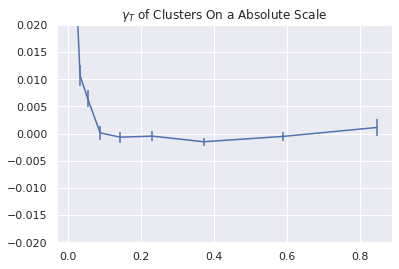

[-72.8825 -93.0708 -52.5981 -51.8193  -1.6537  14.1954  14.7794  62.1652
  20.5802 -11.3641]
------------------------------------------------------------------------------
[ -6473.4803 -12017.4633 -16684.5622 -23499.21   -32286.1992 -41754.7944
 -46281.6882 -40892.9798 -21077.1094  -1700.9946]
------------------------------------------------------------------------------
[ 1497.  3113.  4927.  8098. 13333. 21519. 31634. 41339. 39818. 10108.]
------------------------------------------------------------------------------
[-0.0487 -0.0299 -0.0107 -0.0064 -0.0001  0.0007  0.0005  0.0015  0.0005
 -0.0011]
------------------------------------------------------------------------------
[-4.3243 -3.8604 -3.3864 -2.9019 -2.4215 -1.9404 -1.463  -0.9892 -0.5293
 -0.1683]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

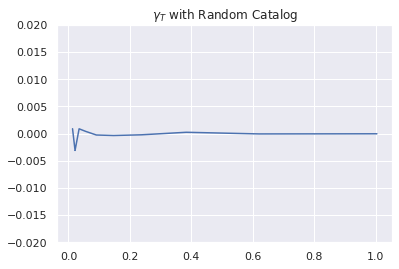

[ 8.9371e-04 -3.0974e-03  8.7790e-04  4.0420e-04 -2.5962e-04 -3.5651e-04
 -2.2586e-04  2.3870e-04 -6.3292e-05 -3.6901e-05]
[-8.1827e-06  2.8360e-05 -8.0379e-06 -3.7008e-06  2.3770e-06  3.2642e-06
  2.0679e-06 -2.1855e-06  5.7949e-07  3.3786e-07]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

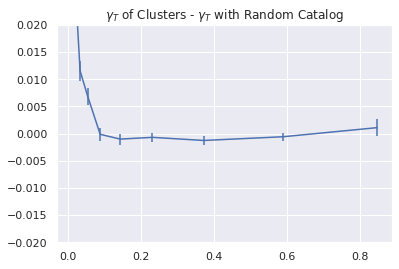

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

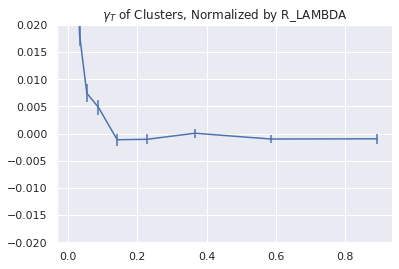

[-46.2363 -90.4433 -71.6589 -46.8967 -49.5313  19.0895  27.3736  -2.271
  43.9127  27.3263]
------------------------------------------------------------------------------
[ -3519.3394  -8762.1729 -13373.9469 -18369.0863 -24935.2204 -32916.1263
 -38530.8058 -37069.9915 -23423.4808  -3260.8189]
------------------------------------------------------------------------------
[  816.  2271.  3943.  6315. 10265. 16869. 26092. 36921. 43809. 28348.]
------------------------------------------------------------------------------
[-5.6662e-02 -3.9825e-02 -1.8174e-02 -7.4262e-03 -4.8253e-03  1.1316e-03
  1.0491e-03 -6.1510e-05  1.0024e-03  9.6396e-04]
------------------------------------------------------------------------------
[-4.3129 -3.8583 -3.3918 -2.9088 -2.4291 -1.9513 -1.4767 -1.004  -0.5347
 -0.115 ]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)